<a href="https://www.kaggle.com/code/mrunalchikhale/student-performance-prediction-project?scriptVersionId=298038371" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Project: Student Performance Prediction 

# Business Objective

**Educational institutions aim to improve student academic outcomes and reduce failure or dropout rates. However, identifying students who are at risk of poor academic performance is often challenging due to the large volume of student data and lack of predictive insights.

The primary objective of this project is to develop a machine learning model that predicts student performance based on various academic, behavioral, and demographic factors. This predictive system will help institutions make data-driven decisions to enhance student success**

In [1]:
import numpy as np 
import pandas as pd 
import random
random.seed(4)

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import classification_report,confusion_matrix
import warnings 
warnings.filterwarnings('ignore')

# Load Data

In [2]:
# Loading of dataset
df = pd.read_csv('/kaggle/input/student-performance-data/student_data.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [5]:
df.info

<bound method DataFrame.info of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel fre

In [6]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [7]:
df.shape

(395, 33)

In [8]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [9]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [10]:
df['sex'].value_counts()

sex
F    208
M    187
Name: count, dtype: int64

# Data Preparation

In [11]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [12]:
# checking duplicate values
df.duplicated().any()

np.False_

In [13]:
# dividing data into categorial and numerical values
cate_val = []
cont_val = []

for column in df.columns:
    if df[column].nunique()<=5:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [14]:
cate_val

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health']

In [15]:
cont_val

['age', 'absences', 'G1', 'G2', 'G3']

# EDA

**dropping column**

**renaming column**

**sorting by values**

**make visualizations**

In [16]:
df = df.drop(['famsize','Medu','Fedu','reason','guardian','traveltime','famrel','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','famrel','freetime','goout'],axis = 1)
df

,school,sex,age,address,Pstatus,Mjob,Fjob,studytime,failures,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,A,at_home,teacher,2,0,1,1,3,6,5,6,6
1,GP,F,17,U,T,at_home,other,2,0,1,1,3,4,5,5,6
2,GP,F,15,U,T,at_home,other,2,3,2,3,3,10,7,8,10
3,GP,F,15,U,T,health,services,3,0,1,1,5,2,15,14,15
4,GP,F,16,U,T,other,other,2,0,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,A,services,services,2,2,4,5,4,11,9,9,9
391,MS,M,17,U,T,services,services,1,0,3,4,2,3,14,16,16
392,MS,M,21,R,T,other,other,1,3,3,3,3,3,10,8,7
393,MS,M,18,R,T,services,other,1,0,3,4,5,0,11,12,10


In [17]:
#renaming 
df = df.rename(columns = {"G1" : "sub1","G2" : "sub2","G3" : "sub3"})
df.head(5)

,school,sex,age,address,Pstatus,Mjob,Fjob,studytime,failures,Dalc,Walc,health,absences,sub1,sub2,sub3
0,GP,F,18,U,A,at_home,teacher,2,0,1,1,3,6,5,6,6
1,GP,F,17,U,T,at_home,other,2,0,1,1,3,4,5,5,6
2,GP,F,15,U,T,at_home,other,2,3,2,3,3,10,7,8,10
3,GP,F,15,U,T,health,services,3,0,1,1,5,2,15,14,15
4,GP,F,16,U,T,other,other,2,0,1,2,5,4,6,10,10


In [18]:
df.sort_values(by='sub3', ascending=False).head(5)

,school,sex,age,address,Pstatus,Mjob,Fjob,studytime,failures,Dalc,Walc,health,absences,sub1,sub2,sub3
47,GP,M,16,U,T,health,services,4,0,1,1,2,4,19,19,20
286,GP,F,18,U,T,at_home,at_home,3,0,1,2,2,5,18,18,19
374,MS,F,18,R,T,other,other,3,0,1,1,1,0,19,18,19
110,GP,M,15,U,A,teacher,teacher,1,0,1,1,4,6,18,19,19
8,GP,M,15,U,A,services,other,2,0,1,1,1,0,16,18,19


In [19]:
df.columns

Index(['school', 'sex', 'age', 'address', 'Pstatus', 'Mjob', 'Fjob',
       'studytime', 'failures', 'Dalc', 'Walc', 'health', 'absences', 'sub1',
       'sub2', 'sub3'],
      dtype='object')

<Axes: xlabel='health'>

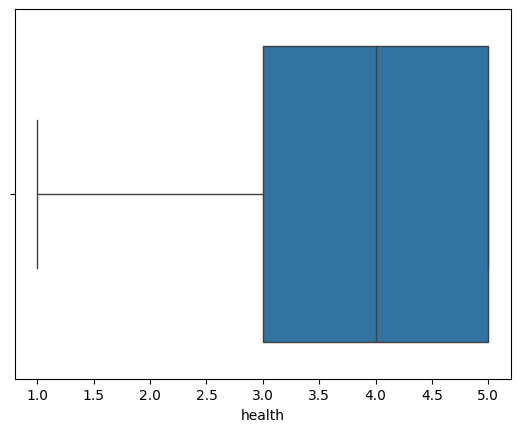

In [20]:
sns.boxplot(x=df['health'])

<Axes: >

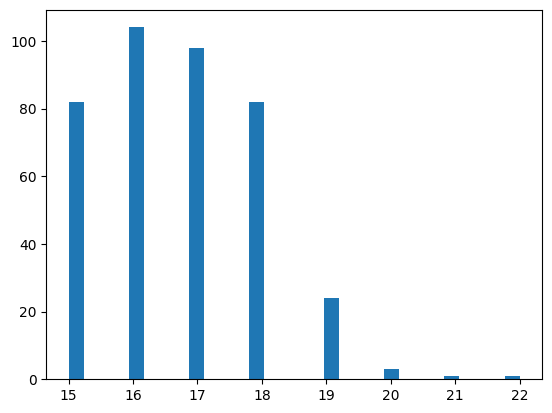

In [21]:
df['age'].hist(bins=30,grid=False)

<Axes: title={'center': 'studytime'}, xlabel='failures'>

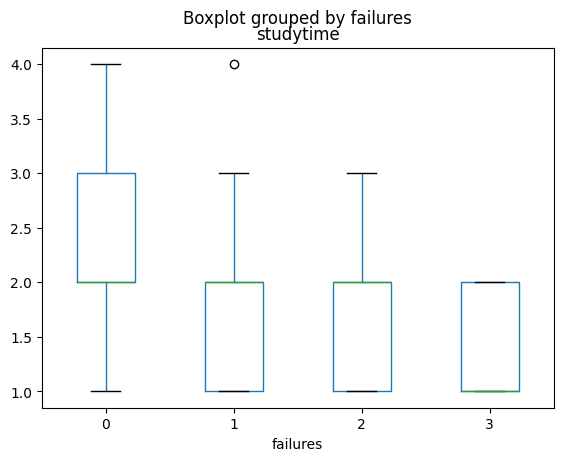

In [22]:
df.boxplot(column='studytime',grid=False,by="failures")

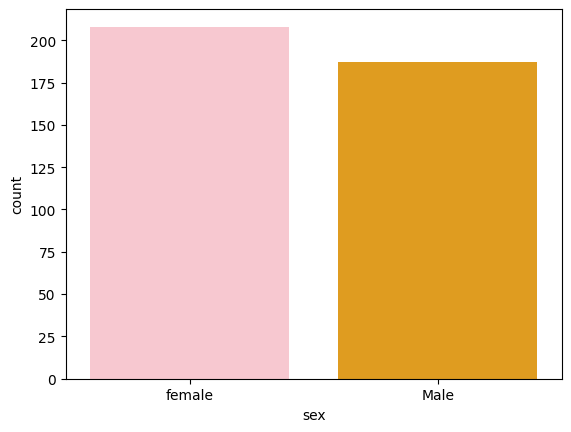

In [23]:
sns.countplot(x = 'sex',data = df, palette=['pink', 'orange'])
plt.xticks([0,1],['female','Male'])
plt.show()

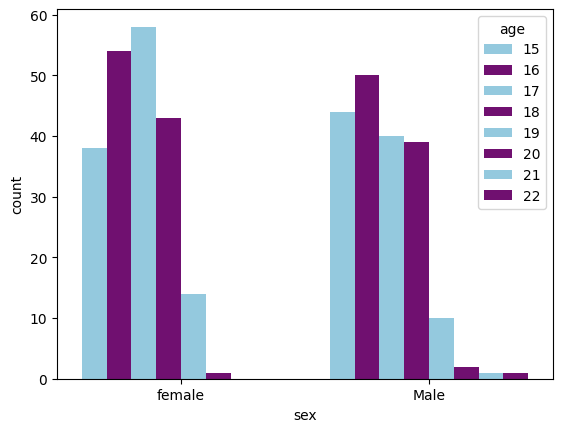

In [24]:
sns.countplot(x = 'sex',hue = 'age',data = df,palette=['skyblue', 'purple'])
plt.xticks([0,1],['female','Male'])
# plt.legend(labels = ['No-disease','Disease'])
plt.show()

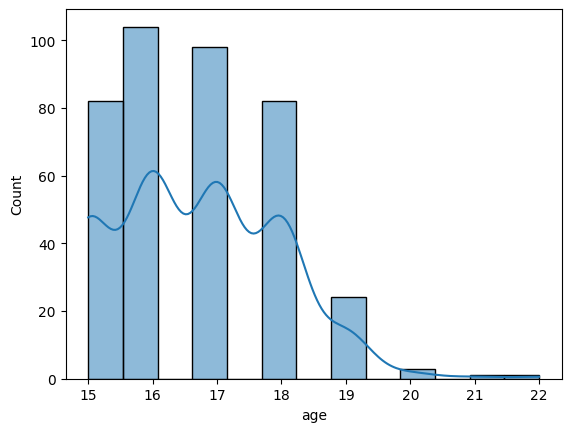

In [25]:
sns.histplot(df['age'],kde = True)
plt.show()

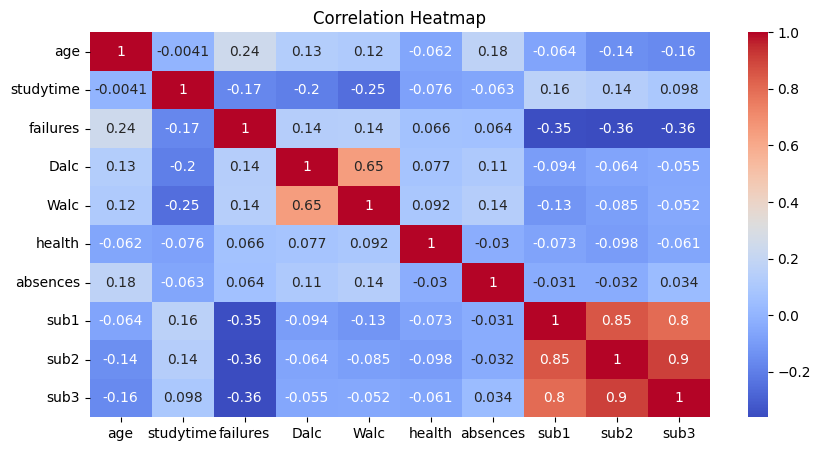

In [26]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Splitting dataset into training & testing set

In [27]:
df = pd.get_dummies(df, drop_first=True)

In [28]:
X = df.drop("sub3", axis=1)
y = df["sub3"]

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [30]:
X_train

,age,studytime,failures,Dalc,Walc,health,absences,sub1,sub2,school_MS,...,address_U,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher
181,16,2,0,1,2,3,2,12,13,False,...,True,True,False,False,True,False,False,True,False,False
194,16,1,0,1,1,3,0,13,14,False,...,True,True,False,True,False,False,False,True,False,False
173,16,2,3,1,1,3,0,8,7,False,...,True,True,False,False,False,False,False,False,True,False
63,16,3,0,2,4,4,2,10,9,False,...,True,True,False,False,False,True,True,False,False,False
253,16,1,0,1,3,3,0,8,9,False,...,False,True,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,15,4,0,1,1,3,0,10,10,False,...,True,True,False,True,False,False,False,True,False,False
106,15,4,0,1,1,3,8,7,8,False,...,True,True,False,True,False,False,False,True,False,False
270,19,2,2,3,3,5,15,9,9,False,...,True,True,False,True,False,False,False,False,True,False
348,17,3,0,1,3,4,0,13,15,False,...,True,True,True,False,False,False,False,True,False,False


In [31]:
X_test

,age,studytime,failures,Dalc,Walc,health,absences,sub1,sub2,school_MS,...,address_U,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher
78,17,1,3,1,1,3,2,8,8,False,...,True,True,False,True,False,False,False,True,False,False
371,18,1,0,2,3,3,3,14,12,True,...,False,True,False,False,False,False,False,False,True,False
248,18,2,1,1,3,5,8,3,5,False,...,False,True,False,True,False,False,False,False,True,False
55,16,2,0,1,1,2,8,8,9,False,...,True,False,False,True,False,False,False,True,False,False
390,20,2,2,4,5,4,11,9,9,True,...,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,17,2,0,1,2,3,0,12,11,True,...,False,True,False,True,False,False,False,False,True,False
82,15,2,0,1,1,5,10,7,6,False,...,True,True,False,False,True,False,False,True,False,False
114,15,2,0,1,1,5,8,9,9,False,...,False,True,True,False,False,False,False,False,True,False
3,15,3,0,1,1,5,2,15,14,False,...,True,True,True,False,False,False,False,False,True,False


In [32]:
y_train

181    12
194    14
173     0
63      9
253     8
       ..
71     10
106     8
270     9
348    15
102    14
Name: sub3, Length: 316, dtype: int64

In [33]:
y_test

78     10
371    12
248     5
55     10
390     9
       ..
364    12
82      6
114     9
3      15
18      5
Name: sub3, Length: 79, dtype: int64

# Feature scaling

In [34]:
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

# Model selection

# Using Logistic regression model

In [35]:
lr = LogisticRegression()

In [36]:
lr.fit(X_train,y_train)

LogisticRegression()

In [37]:
y_pred_lr = lr.predict(X_test)

In [38]:
print("MAE:", mean_absolute_error(y_test, y_pred_lr)) # MSE for average error in marks
print("MSE:", mean_squared_error(y_test, y_pred_lr)) # MSE for average of squared diff betn actual and predicted values
print("R2 Score:", r2_score(y_test, y_pred_lr)) # r2 for model explains how many percent of variation in final exam scores

MAE: 1.9240506329113924
MSE: 8.329113924050633
R2 Score: 0.5938017691369988


# Decision Tree

In [39]:
dt = DecisionTreeClassifier()

In [40]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
y_pred_dt = dt.predict(X_test)

In [42]:
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R2 Score:", r2_score(y_test, y_pred_dt))


MAE: 1.4430379746835442
MSE: 6.025316455696203
R2 Score: 0.7061544712905948


**Comparing 2 models on the basis on r2_scores**

In [43]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree"],
    "R2 Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_dt)
    ]
})
results


# Here linear reg explains 59% of variation in final exam scores
# Here decision Tree explains 70% of variation in final exam scores --- better

,Model,R2 Score
0,Linear Regression,0.593802
1,Decision Tree,0.706154


# Choosing decision Tree

**Decision Tree performed better because it achieved a higher R² score of 0.593 compared to 0.704 for Linear Regression,it means it explains more variance in the final exam scores.**

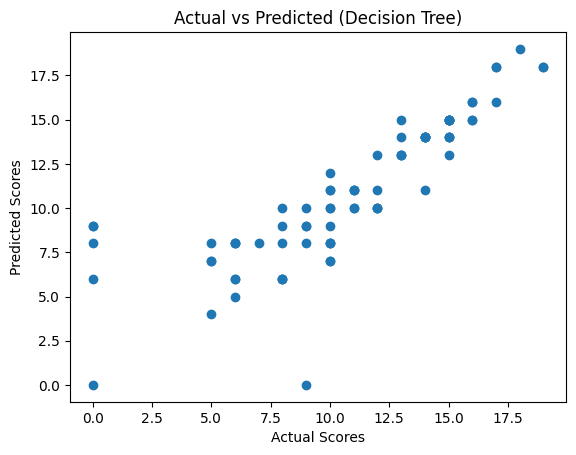

In [44]:
plt.scatter(y_test, y_pred_dt)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted (Decision Tree)")
plt.show()